# Phase 0:

# **CA 04:**
##Pardis Zandkarimi
##810101081
In this CA we learned about different types of ML algorithms and 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv ('house_data.csv')
df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.00000,21613.00000,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,18528.000000,2.161300e+04,18530.000000,...,21613.000000,21184.000000,18531.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,10806.00000,4.580302e+09,5.401822e+05,3.367464,2.111900,2077.569031,1.510697e+04,1.492903,...,1788.390691,292.121082,1970.896714,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,50.994864
std,6239.28002,6239.28002,6239.28002,2.876566e+09,3.673622e+05,0.943028,0.780697,953.971679,4.142051e+04,0.538562,...,828.090978,442.637777,29.406420,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411
min,0.00000,0.00000,0.00000,1.000102e+06,7.500000e+04,-5.000000,-5.000000,-33323.000000,5.200000e+02,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5403.00000,5403.00000,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,25.000000
50%,10806.00000,10806.00000,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.618000e+03,1.500000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,47.000000
75%,16209.00000,16209.00000,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,...,2210.000000,560.000000,1996.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,71.000000
max,21612.00000,21612.00000,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


<ipython-input-5-6c3bb3829928>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), center=0, cmap='RdPu')


<Axes: >

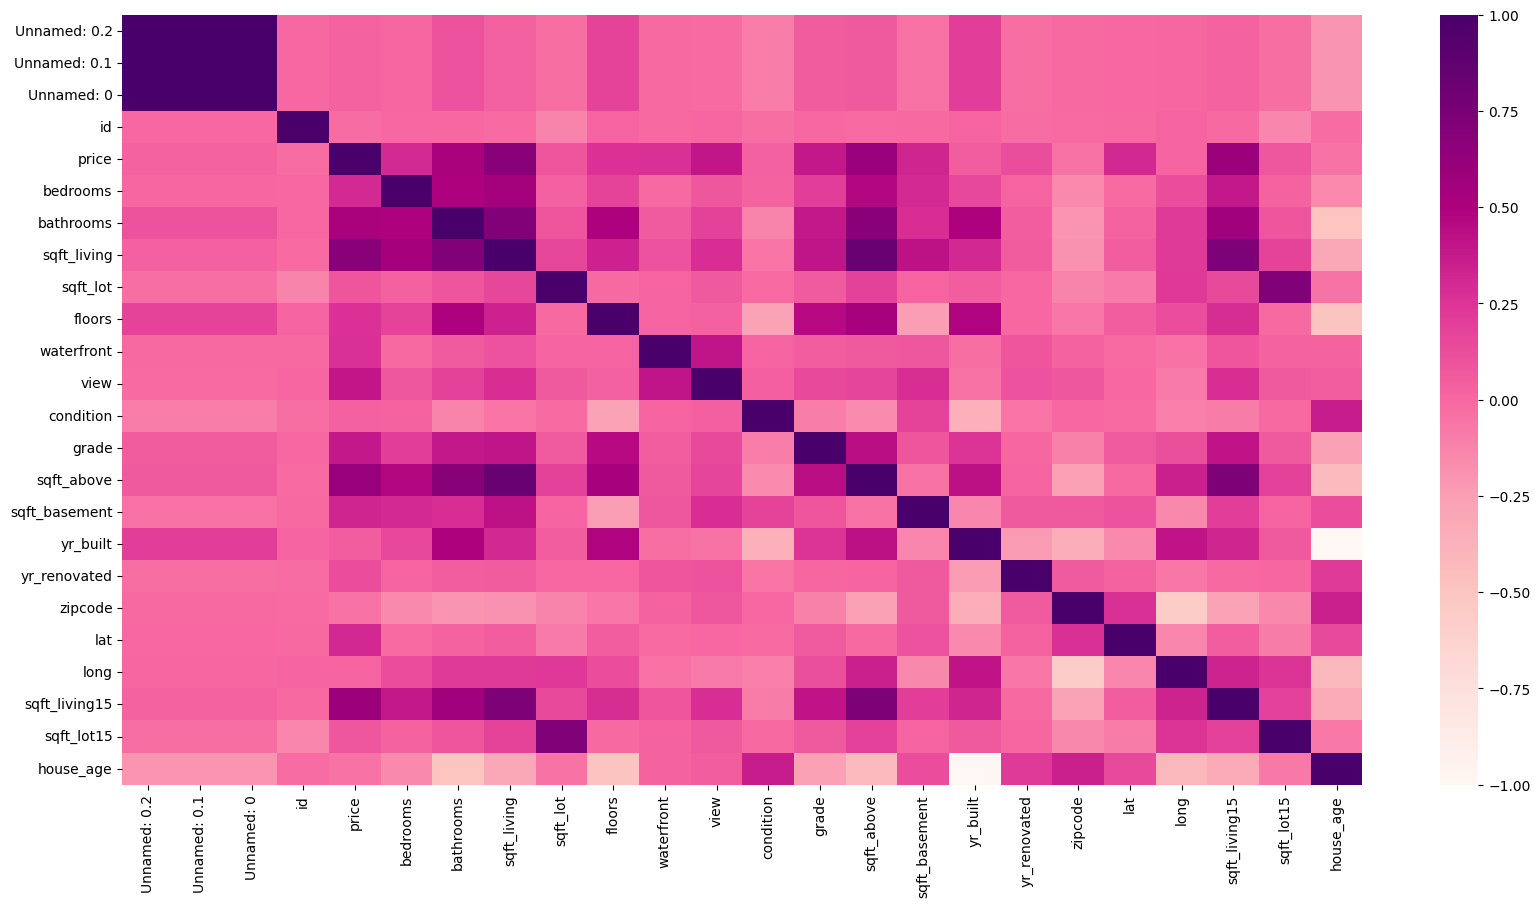

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), center=0, cmap='RdPu')

In [6]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,style,house_age
0,0,0,0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650,...,1955.0,0,98178,47.5112,-122.257,1340,5650,Suburban,Contemporary,67
1,1,1,1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242,...,NaN,1991,98125,47.7210,-122.319,1690,7639,Suburban,Ranch,71
2,2,2,2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000,...,1933.0,0,98028,47.7379,-122.233,2720,8062,Rural,Victorian,89
3,3,3,3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000,...,1965.0,0,98136,47.5208,-122.393,1360,5000,Urban,Colonial,57
4,4,4,4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080,...,1987.0,0,98074,47.6168,-122.045,1800,7503,Suburban,Cape Cod,35


In [7]:
df.info()
# standardizing_columns = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 
#                          'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.2   21613 non-null  int64  
 1   Unnamed: 0.1   21613 non-null  int64  
 2   Unnamed: 0     21613 non-null  int64  
 3   id             21613 non-null  int64  
 4   date           21613 non-null  object 
 5   price          21613 non-null  float64
 6   bedrooms       21613 non-null  int64  
 7   bathrooms      21613 non-null  float64
 8   sqft_living    18528 non-null  float64
 9   sqft_lot       21613 non-null  int64  
 10  floors         18530 non-null  float64
 11  waterfront     21613 non-null  int64  
 12  view           21613 non-null  int64  
 13  condition      21613 non-null  int64  
 14  grade          21613 non-null  int64  
 15  sqft_above     21613 non-null  int64  
 16  sqft_basement  21184 non-null  float64
 17  yr_built       18531 non-null  float64
 18  yr_ren

In [8]:
df.isnull().sum()

Unnamed: 0.2        0
Unnamed: 0.1        0
Unnamed: 0          0
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living      3085
sqft_lot            0
floors           3083
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement     429
yr_built         3082
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
location            0
style               0
house_age           0
dtype: int64

In [9]:
df['style'].replace(['Contemporary', 'Ranch', 'Victorian', 'Colonial', 'Cape Cod'], [0, 1, 2, 3, 4], inplace = True)
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%dT%H%M%S')
df['date'] = df['date'].astype(int)
df['location'].replace(['Suburban', 'Rural', 'Urban'],[0,1, 2], inplace = True)

In [10]:
correlations = df.corr()['price']
correlations = correlations.sort_values()

In [11]:
print(correlations)

house_age       -0.053982
zipcode         -0.053168
id              -0.016797
date            -0.004366
style           -0.000507
location         0.004330
long             0.021571
Unnamed: 0.2     0.027344
Unnamed: 0.1     0.027344
Unnamed: 0       0.027344
condition        0.036392
yr_built         0.054118
sqft_lot15       0.082456
sqft_lot         0.089655
yr_renovated     0.126442
floors           0.258603
waterfront       0.266331
bedrooms         0.304521
lat              0.306919
sqft_basement    0.321825
grade            0.389227
view             0.397346
bathrooms        0.517952
sqft_living15    0.585374
sqft_above       0.605566
sqft_living      0.676542
price            1.000000
Name: price, dtype: float64


<ipython-input-12-6d2ca96e1d66>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns, rotation=90)


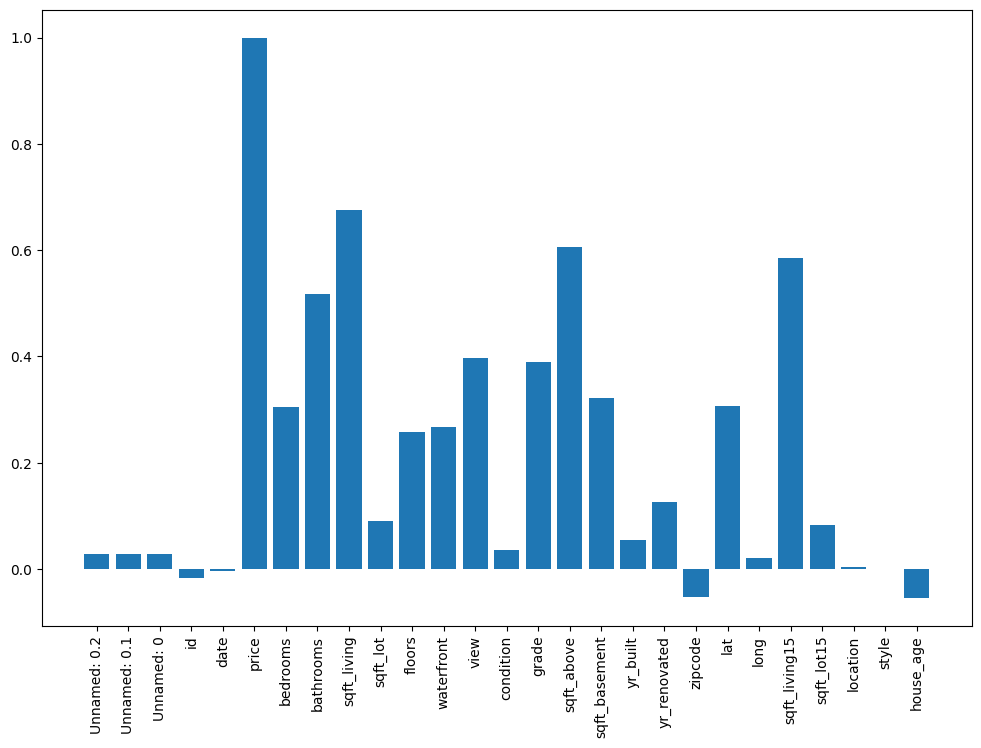

In [12]:
# corr = df.corr()['price']
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df.columns, df.corr()['price'])
ax.set_xticklabels(df.columns, rotation=90)
plt.show()

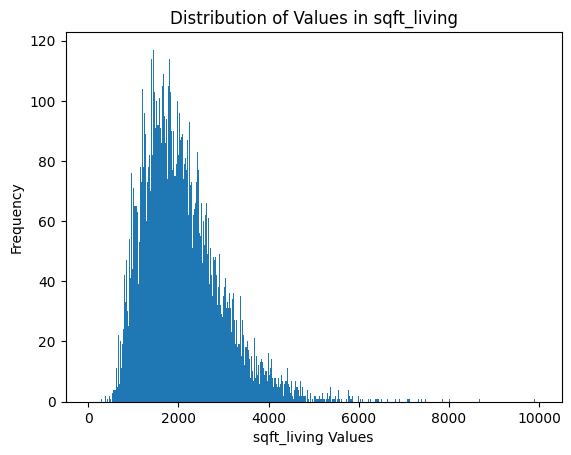

In [13]:
plt.hist(df['sqft_living'], bins=1000 , range = [0, 10000]) #, range = [0, 10000]
plt.title('Distribution of Values in sqft_living')
plt.xlabel('sqft_living Values')
plt.ylabel('Frequency')
plt.show()

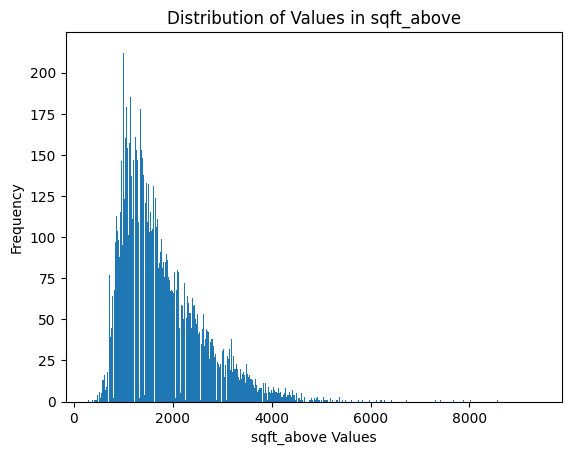

In [14]:
plt.hist(df['sqft_above'], bins=1000)
plt.title('Distribution of Values in sqft_above')
plt.xlabel('sqft_above Values')
plt.ylabel('Frequency')
plt.show()

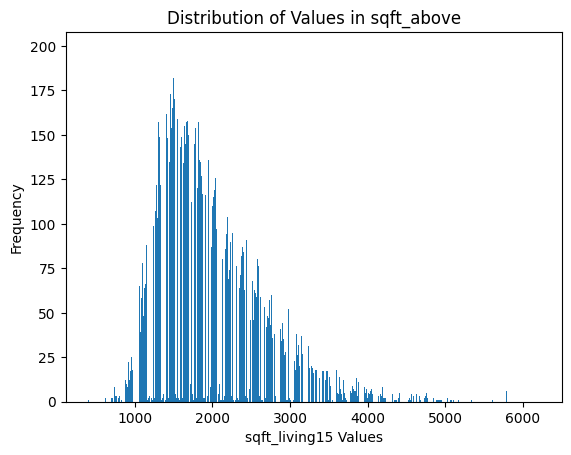

In [15]:
plt.hist(df['sqft_living15'], bins=1000)
plt.title('Distribution of Values in sqft_above')
plt.xlabel('sqft_living15 Values')
plt.ylabel('Frequency')
plt.show()

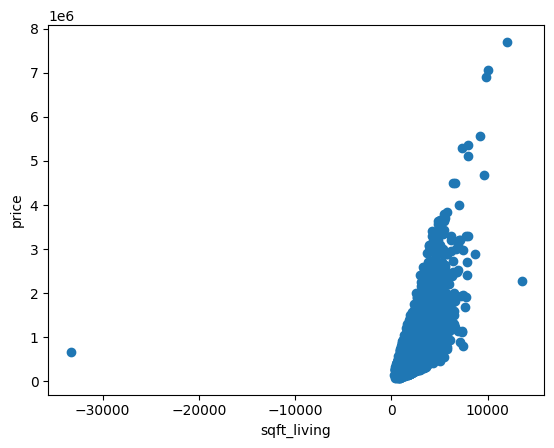

In [16]:
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

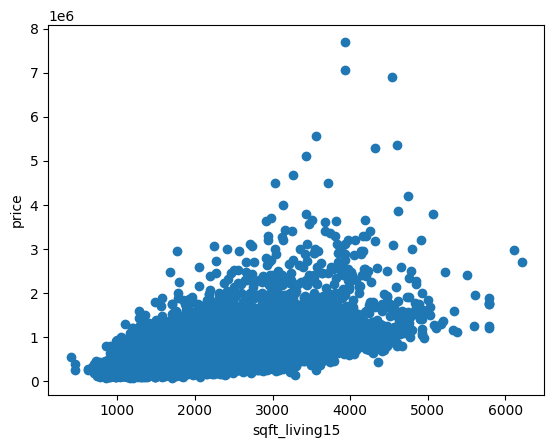

In [17]:
plt.scatter(df['sqft_living15'], df['price'])
plt.xlabel('sqft_living15')
plt.ylabel('price')
plt.show()

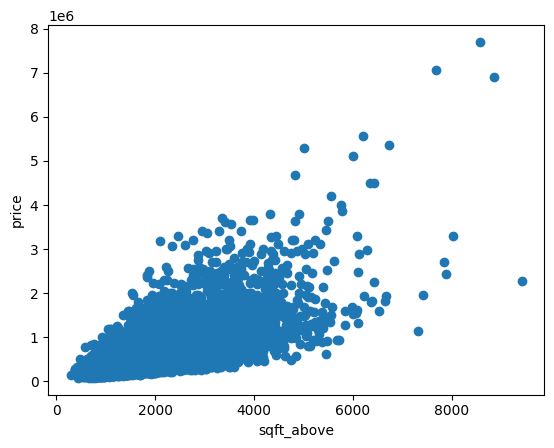

In [18]:
plt.scatter(df['sqft_above'], df['price'])
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.show()

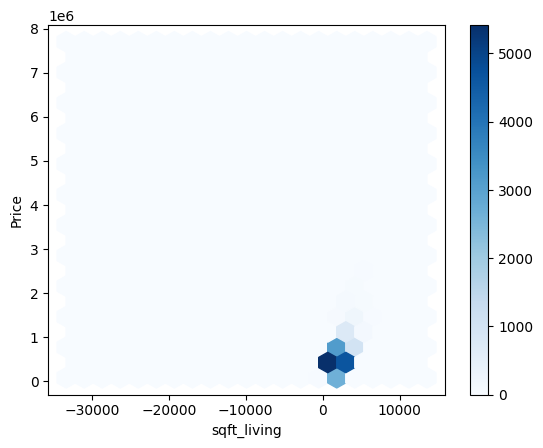

In [19]:
plt.hexbin(df['sqft_living'], df['price'], gridsize=20, cmap='Blues')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.colorbar()
plt.show()

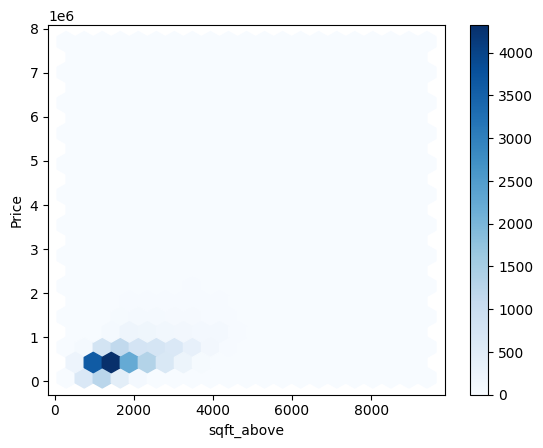

In [20]:
plt.hexbin(df['sqft_above'], df['price'], gridsize=20, cmap='Blues')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.colorbar()
plt.show()

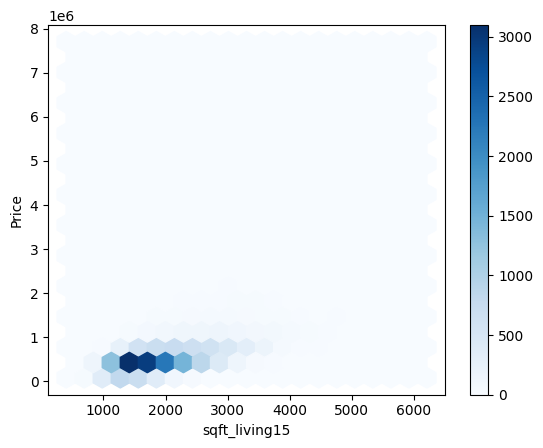

In [21]:
plt.hexbin(df['sqft_living15'], df['price'], gridsize=20, cmap='Blues')
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.colorbar()
plt.show()

# preprocessing:


## Q1:

Handling missing values in a dataset is an important step in machine learning as most algorithms cannot work with missing data. There are several ways to handle missing values, each with its own pros and cons:

**Removal of missing values:**
The simplest way to handle missing values is to remove rows or columns that contain missing data. The pros of this method are that it is simple and can be effective in cases where the amount of missing data is relatively small. However, the cons are that it can lead to a loss of information and may not be suitable for datasets with a large number of categorical missing values.

**Imputation:**
Imputation is the process of replacing missing values with estimated or predicted values. There are several methods for imputation, including mean imputation, median imputation, and regression imputation. The pros of imputation are that it can be more accurate than removal and can preserve more information in the dataset. However, the cons are that it can introduce bias into the dataset and may not be suitable for datasets with a large number of missing values.

**Using a separate category:**
In some cases, missing values can be treated as a separate category. For example, if a dataset contains information about car models and some models have missing data for the number of doors, the missing values can be treated as a separate category. The pros of this method are that it can preserve information about the missing data and may be useful in cases where the amount of missing data is small. However, the cons are that it can lead to a loss of information and may not be suitable for datasets with a large number of missing values.

**Machine learning algorithms:**
Some machine learning algorithms, such as decision trees and random forests, can handle missing data directly. These algorithms can use the available data to make predictions about the missing data. The pros of this method are that it can be more accurate than imputation and can preserve more information in the dataset. However, the cons are that it can be computationally expensive and may not be suitable for datasets with a large number of missing values.

## Q2:

In [22]:
df.isnull().sum()

Unnamed: 0.2        0
Unnamed: 0.1        0
Unnamed: 0          0
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living      3085
sqft_lot            0
floors           3083
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement     429
yr_built         3082
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
location            0
style               0
house_age           0
dtype: int64

In this case all missing values are numeric so we can use imputation (mean)

In [23]:
df['sqft_living'].fillna((df['sqft_living'].mean()), inplace = True)
df['floors'].fillna((int(df['floors'].mean())), inplace = True)
df['yr_built'].fillna(((df['yr_built'].mean())), inplace = True)
df['sqft_basement'].fillna((df['sqft_basement'].mean()), inplace = True)

In [24]:
df.isnull().sum()


Unnamed: 0.2     0
Unnamed: 0.1     0
Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
location         0
style            0
house_age        0
dtype: int64

## Q3: 


By normalizing or standardizing the features, we can avoid the situation where one feature has a much larger range of values than another feature, which can cause some machine learning algorithms to be biased towards the larger feature. Normalizing or standardizing the features can also help to speed up the convergence of some machine learning algorithms during training. However, it is important to note that normalization or standardization can also have negative effects on the performance of some machine learning algorithms, especially if the distribution of the data is highly skewed or if there are outliers in the data. Therefore, it is recommended to experiment with both normalized and unnormalized data to determine which preprocessing method works best for a particular problem.
Since we have gaussian distribution for columns, we can standardize.

In [25]:
standardizing_columns = ['yr_built', 'date', 'price', 'bedrooms', 'bathrooms', 
                         'sqft_living', 'floors', 'waterfront', 'view', 'zipcode', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']
def standardize(df, columns):
    result = df.copy()
    for col in columns:
        result[col] = (result[col] - result[col].mean()) / result[col].std()
        # result[col] /= result[col].sum()
    return result

df = standardize(df, standardizing_columns)

## Q4:



**Label Encoding :** Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer.

**One-Hot Encoding :** One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

Here we used Label encoding(before finding correlations)


## Q5:

Yes there are some columns that have low correlations with price and that has negative impact on the . And some of them are simply indexes.

In [26]:
print(correlations)

house_age       -0.053982
zipcode         -0.053168
id              -0.016797
date            -0.004366
style           -0.000507
location         0.004330
long             0.021571
Unnamed: 0.2     0.027344
Unnamed: 0.1     0.027344
Unnamed: 0       0.027344
condition        0.036392
yr_built         0.054118
sqft_lot15       0.082456
sqft_lot         0.089655
yr_renovated     0.126442
floors           0.258603
waterfront       0.266331
bedrooms         0.304521
lat              0.306919
sqft_basement    0.321825
grade            0.389227
view             0.397346
bathrooms        0.517952
sqft_living15    0.585374
sqft_above       0.605566
sqft_living      0.676542
price            1.000000
Name: price, dtype: float64


In [27]:
to_drop = ['Unnamed: 0.2','id', 'Unnamed: 0.1', 'Unnamed: 0', 'location', 'id', 'date', 'sqft_lot', 'sqft_lot15', 'house_age']
df.drop(to_drop, axis=1, inplace=True)

## Q6: 

The decision of the train/test data split ratio depends on various factors such as the size of the dataset, the complexity of the problem, and the availability of data. However, a common practice is to use a split ratio of 70/30 or 80/20 for train/test data, where 70% or 80% of the data is used for training and the remaining 30% or 20% is used for testing. It is important to have a sufficiently large training set to effectively learn the patterns in the data, while also having a reasonable-sized test set to evaluate the performance of the model. Adjustments to the split ratio can be made based on specific considerations and requirements of the problem at hand.

In [28]:
test_size = 0.2
x = df.drop('price', axis=1)
y = df['price']  
train_df, test_df, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)


## Q7:

This subset of data is used to evaluate the model's performance during training. It helps in tuning the hyperparameters of the model and selecting the best-performing model among different variants. The validation data provides an unbiased estimate of the model's performance, as it is separate from the training data.

# Phase 1: Linear Regression

Main form of simple linear regression function: 
$$f(x) = \alpha x + \beta$$

here we want to find the intercept($\alpha$) and slope($\beta$) by minimizing the derivation of the RSS function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in term of $\underline{\alpha}$ and $\underline{\beta}$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$ 
$$ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x}$$



## Q1:

y = beta - alpha * x
where y is dependent value and x is independent value. Alpha is slope and beta is intercept (value of y when x=0)
The goal of linear regression is to estimate the values of slope and intercept that minimize the sum of squared errors (residuals) between the predicted values and the actual values of y.

## Q2:

In this case we should choose a feature with the highest correlation. (sqft_living)

Based on the formula above, complete this function to compute the parameters of a simple linear regression

In [29]:
def simple_linear_regression(input_feature, output):
    # Compute the sum of input_feature and output
    x_sum = sum(input_feature)
    y_sum = sum(output)
    n = len(input_feature)

    # Compute the product of the output and the input_feature and its sum
    # xy_sum = sum([x*y for x,y in zip(input_feature, output)])
    xi_xMean = input_feature - (x_sum/n)
    yi_yMean = output - (y_sum/n)
    soorat_slope = sum([x*y for x,y in zip(xi_xMean, yi_yMean)])
    makhraj_slope = sum([x*y for x,y in zip(xi_xMean, xi_xMean)])
    # Compute the squared value of the input_feature and its sum
    # x_squared_sum = sum([x**2 for x in input_feature])
    
    # Use the formula for the slope
    
    # slope = (n*xy_sum - x_sum*y_sum)/(n*x_squared_sum - x_sum**2)
    slope = soorat_slope/makhraj_slope
    # Use the formula for the intercept
    intercept = (y_sum - slope*x_sum)/n
    
    return (intercept, slope)

Now complete this function to predict the value of given data based on the calculated intercept and slope

In [30]:
def get_regression_predictions(input_feature, intercept, slope):
    # TO DO:

    # calculate the predicted values:
    predicted_values = intercept + slope * input_feature
    
    return (predicted_values)

Now that we have a model and can make predictions let's evaluate our model using Root Mean Square Error (RSME). RMSE is the square root of the mean of the squared differences between the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [31]:
def get_root_mean_square_error(predicted_values , output):
    # TO DO:

    # Compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = output - predicted_values
    # square the residuals and add them up
    squared_residuals = residuals ** 2
    sum_squared_residuals = squared_residuals.sum()
    
    # find the mean of the above phrase
    mean_squared_residuals = sum_squared_residuals / float(len(predicted_values))
    
    # calculate the root
    RMSE = mean_squared_residuals ** 0.5
    return(RMSE)

AS you might guessed, the RMSE has no bound and it is not easy to find out the percentage of fitting the model into data with it. instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. Matematically, the R2 score formula is shown as follows:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In this step, complete the following function to calculate the R2 score of a given input_feature, output, intercept, and slope:

In [32]:
def get_r2_score(predicted_values, output):
    # TO DO:
    y_mean = output.mean()
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = output - predicted_values
    # square the residuals and add them up -> SSres
    ss_res = (residuals ** 2).sum()
    # compute the SStot
    ss_tot = ((output - y_mean) ** 2).sum()
    # compute the R2 score value
    R2_score = 1 - (ss_res / ss_tot)
    return(R2_score)

Now calculate the fitness of the model and explain the outputs

In [33]:
# intercept, slope =  simple_linear_regression(train_df['sqft_living'], train_labels)

# predicted_values = get_regression_predictions(test_df["yr_built"], intercept, slope)
# predicted_values

In [34]:
# test_labels

In [35]:
# TO DO:
# *** Feature: sqft_living
# RSME: 278486.7309615027
# R2 Score: 0.5030774643470592


# *** Feature: yr_built
# RSME: 394479.29909522476
# R2 Score: 0.0029243415438844345


# *** Feature: grade
# RSME: 295063.27608339675
# R2 Score: 0.4421595553496108


# *** Feature: zipcode
# RSME: 394421.8467068397
# R2 Score: 0.00321475073205324

designated_feature_list = ['sqft_living' , 'yr_built' , 'grade' , 'zipcode']

for feature in designated_feature_list:
    intercept, slope =  simple_linear_regression(train_df[feature], train_labels)
    predicted_values = get_regression_predictions(test_df[feature], intercept, slope)
    
    rsme = get_root_mean_square_error(predicted_values , test_labels)
    r2 = get_r2_score(predicted_values, test_labels)
    print(f"\n*** Feature: {feature}")
    print(f"RSME: {rsme}")
    print(f"R2: {r2}")


*** Feature: sqft_living
RSME: 0.8132090462533823
R2: 0.4103456715899553

*** Feature: yr_built
RSME: 1.057674902555495
R2: 0.0025354106866073423

*** Feature: grade
RSME: 0.9392686929539527
R2: 0.2133658751753429

*** Feature: zipcode
RSME: 1.0581070201093028
R2: 0.0017202074417838054


In this example, we can see that 'sqft_living' and 'grade' have higher R2 scores and lower RMSEs compared to 'yr_built' and 'zipcode', indicating that they may be better predictors of the target variable.

**RSS method:**
RSS stands for Residual Sum of Squares, and it is a method used in linear regression to measure the overall fit of the regression model to the observed data.

The RSS is calculated by taking the sum of the squared differences between the predicted values of the dependent variable (y) and the actual observed values (ŷ). In other words, it measures the sum of the squared residuals, which are the differences between the predicted and observed values.

The RSS is used as a measure of the variability or the amount of unexplained variation in the dependent variable that is not captured by the linear regression model. The goal of linear regression is to minimize the RSS by finding the best-fitting line that minimizes the squared differences between the predicted and observed values.

Minimizing the RSS helps to find the optimal values for the intercept and slope of the regression line, which provides the best fit to the data. By minimizing the RSS, the linear regression model is able to explain as much of the variation in the dependent variable as possible based on the given independent variables.

**RMSE method:**

RMSE stands for Root Mean Square Error, which is a commonly used metric to evaluate the performance of a regression model. It measures the average squared difference between the predicted values and the actual values. The steps to calculate RMSE are as follows:

Compute the residuals by subtracting the predicted values from the actual values.
Square the residuals and sum them up.
Find the mean of the squared residuals.
Take the square root of the mean squared error to obtain the RMSE value.

RMSE provides a measure of how well the regression model fits the data, with lower RMSE indicating better fit. It helps to assess the accuracy of the predictions made by the model.

** R2:**
R2, also known as the coefficient of determination, is a statistical measure used in machine learning to evaluate the performance of a regression model. It represents the proportion of the variance in the dependent variable that can be explained by the independent variables in the model.

R2 value ranges from 0 to 1 and can also be expressed as a percentage. A higher R2 value indicates that a larger proportion of the variance in the target variable is explained by the model, suggesting a better fit.

Mathematically, R2 is calculated as:

R2 = 1 - (RSS / TSS)

# Phase 2:

In [36]:
price_median =  df['price'].median()
df['price_level'] = ['HIGH' if price > price_median else 'LOW' for price in df['price']]
price_median

-0.24548565695382554

In [37]:
X = df.drop('price_level', axis = 1)
Y = df['price_level']

In [38]:
test_size = 0.2  
train_df, test_df, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, random_state=42)
train_df = train_df.drop('price', axis = 1)
test_df = test_df.drop('price', axis = 1)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Decision tree:

In [40]:
# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Fit the model to the training data
clf.fit(train_df, train_labels)
# Make predictions on the test data
y_pred = clf.predict(test_df)
y_train_pred = clf.predict(train_df)
# Calculate the accuracy
# accuracy = accuracy_score(test_labels, y_pred)
accuracy = accuracy_score(test_labels, y_pred)
train_accuracy = accuracy_score(train_labels, y_train_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy: ", train_accuracy)

Test Accuracy: 0.8653712699514227
Train Accuracy:  0.9996529786003471


In [41]:
clf = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_df, train_labels)
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred = best_estimator.predict(test_df)
y_train_pred = best_estimator.predict(train_df)
accuracy = accuracy_score(test_labels, y_pred)
train_accuracy = accuracy_score(train_labels, y_train_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy: ", train_accuracy)

Test Accuracy: 0.8797131621559102
Train Accuracy:  0.8946211683053789


## KNN:

In [42]:
from sklearn.neighbors import KNeighborsClassifier

Knn with 3 neighbours: 

In [43]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

k = 3  # Number of neighbors to consider
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(train_df, train_labels)

y_pred = clf.predict(test_df)
train_y_pred = clf.predict(train_df)
train_accuracy = accuracy_score(train_labels, train_y_pred)
accuracy = accuracy_score(test_labels, y_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.7760814249363868
Train Accuracy: 0.8816657027183343


knn with 5 neighbours:

In [44]:
k = 5  # Number of neighbors to consider
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(train_df, train_labels)

y_pred = clf.predict(test_df)
train_y_pred = clf.predict(train_df)
train_accuracy = accuracy_score(train_labels, train_y_pred)
accuracy = accuracy_score(test_labels, y_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.7814018043025677
Train Accuracy: 0.8525159051474841


## Logestic regression:

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
clf = LogisticRegression()
clf.fit(train_df, train_labels)

y_pred = clf.predict(test_df)
y_train_pred = clf.predict(train_df)
accuracy = accuracy_score(test_labels, y_pred)
train_accuracy = accuracy_score(train_labels, y_train_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.8089289845015036
Train Accuracy: 0.8027761711972238


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Q3:

**Overfitting:**
Overfitting occurs when a machine learning model performs extremely well on the training data but fails to generalize well on new, unseen data. One common indication of overfitting is a large difference between the training accuracy and the test accuracy. Here are some scenarios that suggest overfitting:

High Training Accuracy, Low Test Accuracy: If the model achieves high accuracy on the training data but significantly lower accuracy on the test data, it indicates overfitting. The model is memorizing the training data instead of learning patterns that can be applied to new data.

Training Accuracy Close to 100%, Test Accuracy Much Lower: When the training accuracy is very close to 100% but the test accuracy is substantially lower, it suggests overfitting. The model is overly complex and captures noise or random variations in the training data.

Increasing Training Accuracy, Decreasing Test Accuracy: If the training accuracy continues to improve while the test accuracy starts to decline, it implies overfitting. The model is becoming too specialized to the training data and fails to generalize well.

**Underfitting:**
Underfitting occurs when a machine learning model is too simple and fails to capture the underlying patterns in the data, resulting in poor performance on both the training and test data. Here are some signs that indicate underfitting:

Low Training Accuracy: If the model achieves low accuracy on the training data, it suggests underfitting. The model is not able to capture the complexities and patterns present in the data.

Low Test Accuracy: When both the training and test accuracies are low, it indicates underfitting. The model is too simplistic to accurately capture the relationships in the data.

Training and Test Accuracies Converge at a Low Value: If the model shows similar low accuracies on both the training and test data, it suggests underfitting. The model is not able to fit the training data well and lacks the capacity to generalize to new data.

**As we can see none of the above conditions happened in our results so the models operations are reasonably well.**

# Phase 3:

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_df, train_labels)
y_pred = clf.predict(test_df)
y_train_pred = clf.predict(train_df)
accuracy = accuracy_score(test_labels, y_pred)
train_accuracy = accuracy_score(train_labels, y_train_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.9132546842470507
Train Accuracy: 0.9996529786003471


In [50]:
clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(train_df, train_labels)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

clf = RandomForestClassifier(**best_params)
clf.fit(train_df, train_labels)

y_pred = clf.predict(test_df)
y_train_pred = clf.predict(train_df)

accuracy = accuracy_score(test_labels, y_pred)
train_accuracy = accuracy_score(train_labels, y_train_pred)

print("Test Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)


Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Score: 0.9067090803932908
Test Accuracy: 0.9104788341429563
Train Accuracy: 0.9996529786003471


In [51]:
clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(train_df, train_labels)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

clf = RandomForestClassifier(**best_params)
clf.fit(train_df, train_labels)

y_pred = clf.predict(test_df)
y_train_pred = clf.predict(train_df)

accuracy = accuracy_score(test_labels, y_pred)
train_accuracy = accuracy_score(train_labels, y_train_pred)

print("Test Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)

Best Parameters: {'max_depth': None, 'n_estimators': 20}
Best Score: 0.8988432620011567
Test Accuracy: 0.9060837381448068
Train Accuracy: 0.9985540775014459


## Q1:

Number of Trees (n_estimators): This hyperparameter determines the number of decision trees to be included in the random forest. Increasing the number of trees can improve the performance of the model, but it also increases the computational cost. It is important to find an optimal balance based on the specific problem.

Maximum Depth (max_depth): This hyperparameter specifies the maximum depth allowed for each decision tree in the random forest. Controlling the maximum depth helps to limit the complexity of the individual trees and prevent overfitting. It is important to tune this hyperparameter based on the complexity of the dataset and the desired level of generalization.

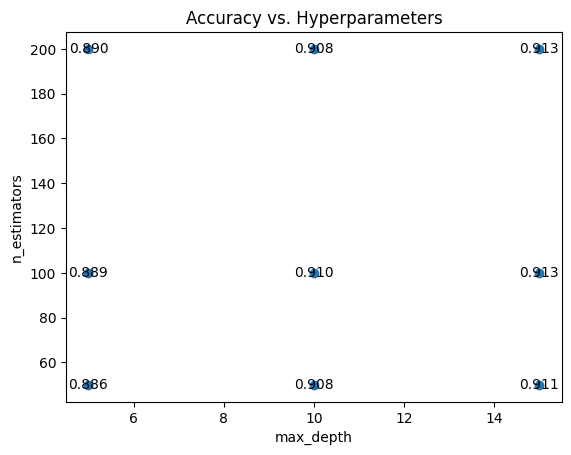

In [52]:
import matplotlib.pyplot as plt

# Define the hyperparameters and their corresponding values
max_depth_values = [15, 5, 10]
n_estimators_values = [50, 100, 200]

# Initialize lists to store the hyperparameter combinations and accuracy
max_depth_list = []
n_estimators_list = []
accuracy_list = []

# Loop through all the hyperparameter combinations
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        # Create and fit the model
        clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
        clf.fit(train_df, train_labels)

        # Make predictions on the test set
        y_pred = clf.predict(test_df)

        # Calculate the accuracy score
        accuracy = accuracy_score(test_labels, y_pred)

        # Store the hyperparameter values and accuracy
        max_depth_list.append(max_depth)
        n_estimators_list.append(n_estimators)
        accuracy_list.append(accuracy)

# Create a scatter plot
plt.scatter(max_depth_list, n_estimators_list)

# Add text annotations for accuracy values
for i in range(len(accuracy_list)):
    plt.text(max_depth_list[i], n_estimators_list[i], f'{accuracy_list[i]:.3f}', ha='center', va='center')

plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.title('Accuracy vs. Hyperparameters')

plt.show()


## Q2: 

In general, a Random Forest model tends to be more accurate than a single Decision Tree model. Random Forest is an ensemble learning method that combines multiple Decision Trees and makes predictions based on the consensus of these trees. It reduces overfitting by introducing randomness and diversity among the individual trees. Random Forest models address the bias-variance trade-off by combining multiple decision trees. Each tree in the forest is trained on a random subset of the data and features, introducing randomness and reducing variance. By aggregating the predictions of multiple trees, Random Forest models can balance bias and variance, resulting in better overall performance.
However, it's important to note that there can be cases where a Decision Tree performs better than a Random Forest, especially if the dataset is small or the problem is relatively simple.
In summary, a single Decision Tree model may have high bias or high variance, whereas Random Forest models tend to reduce variance and achieve a better balance between bias and variance.